In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machineLearning/linearRegressionÖdev/House Price Regression Dataset/house_price_regression_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
df['House_Price'] = df['House_Price'].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [7]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,262382
1,4272,3,3,2016,4.753014,1,6,985260
2,3592,1,2,2016,3.634823,0,9,777977
3,966,1,2,1977,2.730667,1,8,229698
4,4926,2,1,1993,4.699073,0,8,1041740


In [8]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188605e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116260e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016478e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282665e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271408e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108236e+06


In [9]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [10]:
df['House_Age'] = list(map(lambda x: 2025-x, df['Year_Built']))

In [11]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price',
       'House_Age'],
      dtype='object')

In [12]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Age
0,1360,2,1,1981,0.599637,0,5,262382,44
1,4272,3,3,2016,4.753014,1,6,985260,9
2,3592,1,2,2016,3.634823,0,9,777977,9
3,966,1,2,1977,2.730667,1,8,229698,48
4,4926,2,1,1993,4.699073,0,8,1041740,32


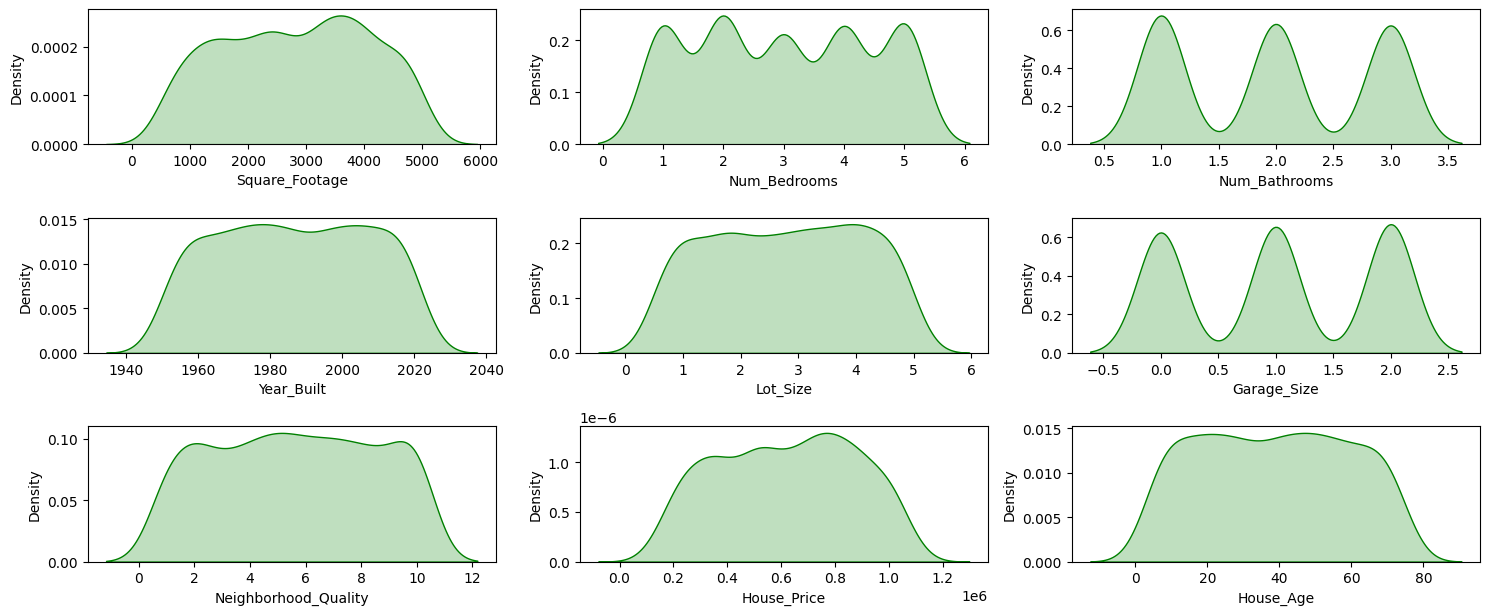

In [13]:
plt.figure(figsize=(15,10))
for i in range(0, len(df.columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[df.columns[i]],color='g',fill=True)
    plt.xlabel(df.columns[i])
    plt.tight_layout()
plt.show()

In [14]:
df.drop('Year_Built', axis=1, inplace=True)

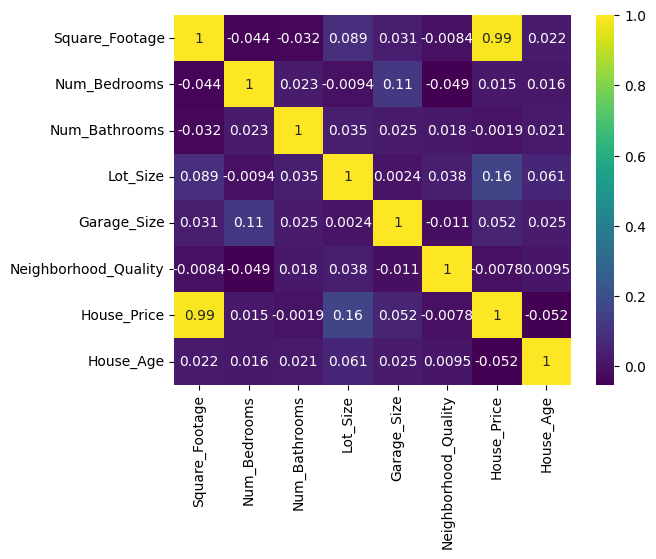

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

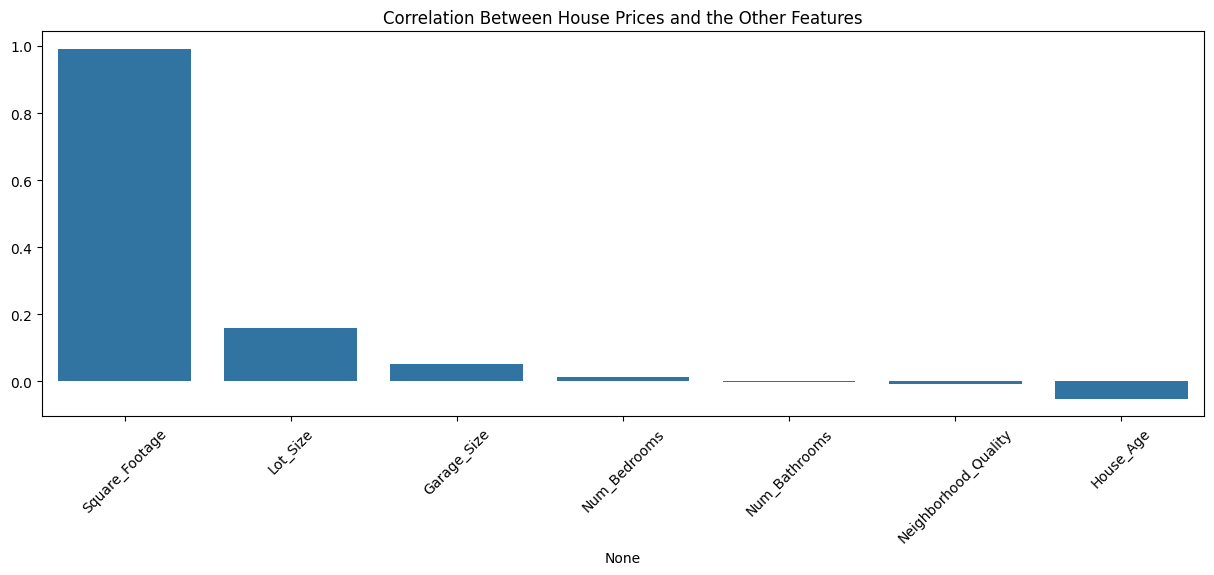

In [16]:
correlations_with_houseprice = df.corr()['House_Price'].drop('House_Price')
correlations_with_houseprice = correlations_with_houseprice.sort_values(ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=correlations_with_houseprice.index, y= correlations_with_houseprice.values)
plt.title('Correlation Between House Prices and the Other Features')
plt.xticks(rotation=45)
plt.show()

- correlations_with_houseprice = correlations_with_houseprice.sort_values(ascending=False): 'House_Price' ile olan korelasyon değerlerini büyükten küçüğe (en güçlü pozitif korelasyondan en güçlü negatif korelasyona doğru) sıralar. Bu, hangi özelliklerin ev fiyatı ile en güçlü ilişkiye sahip olduğunu görsel olarak daha kolay anlamayı sağlar.

In [18]:
X=df.drop('House_Price', axis=1)
y=df['House_Price']

In [19]:
X.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,House_Age
0,1360,2,1,0.599637,0,5,44
1,4272,3,3,4.753014,1,6,9
2,3592,1,2,3.634823,0,9,9
3,966,1,2,2.730667,1,8,48
4,4926,2,1,4.699073,0,8,32


In [20]:
y.head()

,House_Price
0,262382
1,985260
2,777977
3,229698
4,1041740


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=15)

In [23]:
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

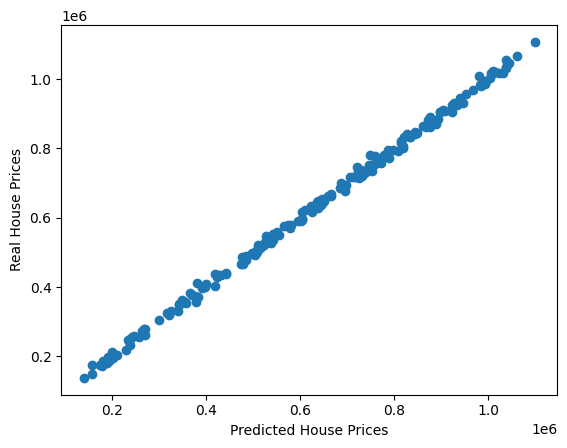

In [29]:
plt.scatter(y_test, y_pred)
plt.ylabel('Real House Prices')
plt.xlabel('Predicted House Prices')
plt.show()

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('R Squared Score: ', score)

Mean Squared Error:  89654502.30052765
Mean Absolute Error:  7511.22936168782
R Squared Score:  0.9985604092323533
